# Random variables and probability


In this notebook, we will make a first approximation to the dataset.

* Random variables and their different types
* Probability

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Reading the dataset


In [2]:
url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,...,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,...,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,...,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9
3,Male,39,Argentina,Corrientes,15.0,15.0,13.0,5,Postgraduate,Incomplete,...,No,No,0.0,0,In my current job,NaN,501-1000,Other industries,7,6
4,Male,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,University,Ongoing,...,Less than a salary,No,0.0,0,Never,NaN,11-50,Services / Software Consulting / Digital,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Male,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciary,Complete,...,No,No,0.0,0,In my current job,No,501-1000,Other industries,7,8
6091,Male,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,University,Ongoing,...,One salary,One,14.0,6,Never,NaN,2001-5000,Other industries,8,10
6092,Male,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,2.0,0,Terciary,Ongoing,...,Less than a salary,One,10.0,4,Never,NaN,201-500,Software based product,7,9
6093,Male,28,Argentina,La Pampa,5.0,3.0,2.0,0,Terciary,Ongoing,...,No,One,20.0,3,Never,No,51-100,Services / Software Consulting / Digital,5,7


In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,...,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,...,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,...,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9


# Analysis of the salary

The first question that comes to mind when we see this survey is: **"What is the salary of software developers in Argentina?"**.

This is a starting point for the analysis of the data set. The whole process will consist of several iterations: as conclusions are drawn, other relevant aspects of the data will be discovered, triggering new questions.

To learn more about the distribution of salaries, it is necessary to choose a column of the survey to analyze.

In [6]:
salary_col = 'salary_monthly_NET'

In [7]:
df[salary_col]

0        43000.000
1        63000.000
2       127000.000
3       102000.000
4       106000.000
           ...    
6090     97000.000
6091     71000.000
6092        45.753
6093        72.000
6094     65000.000
Name: salary_monthly_NET, Length: 6095, dtype: float64

An excellent way to start exploration is through visualization. Seaborn provides a specific plot type for plotting columns containing numbers, called a `displot`. (Don't confuse with `distplot`, which is deprecated).

The generated graph is a **histogram** of frequencies. First, the values taken by the column are plotted on the x-axis, divided into intervals or bins. Then, on the y-axis, the count of occurrences of values in each interval is plotted.

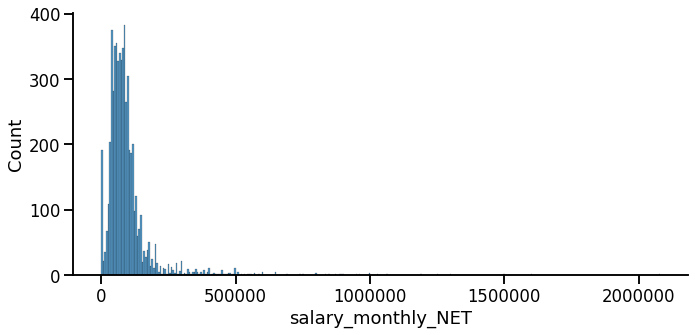

In [8]:
seaborn.displot(df[salary_col], aspect=2)
## Avoid scientific notation in the x axis
plt.ticklabel_format(style='plain', axis='x')

### What can we see?

Simple visualizations are handy for getting to know the shape of your data quickly because they condense a lot of information. For example:
* The range of values taken by the column goes from 0 to approximately 2M.
* Most values condense below 250K, and few exceed 500K.
* The most frequent values appear to be close to 100K.
* There is a peak of occurrences at the value 0 and provide little detail.

## What other types of questions can we ask ourselves at this point that are not answered with a histogram?

<AxesSubplot:xlabel='count', ylabel='work_province'>

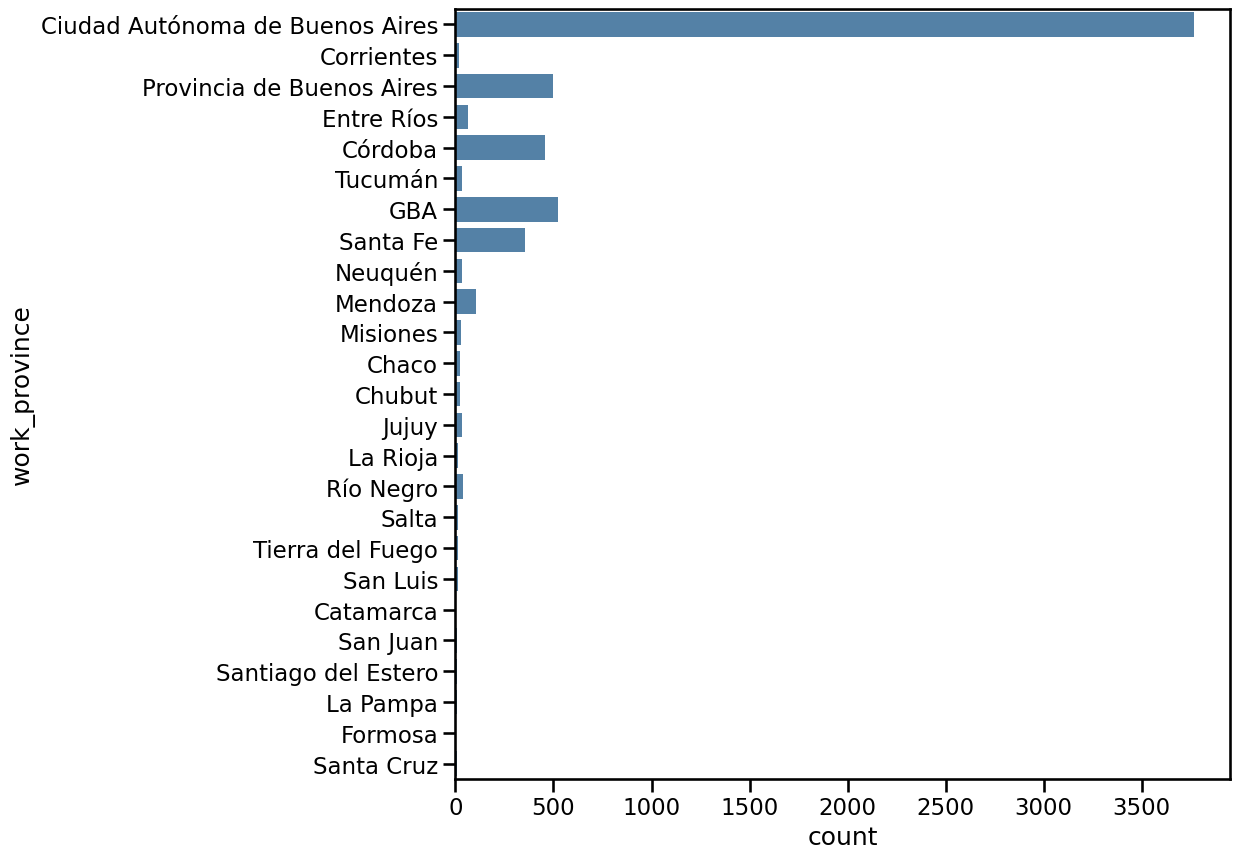

In [9]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df.work_province, color='steelblue')

To continue the analysis, it is necessary to apply theoretical tools provided by Statistics and Probability.

## Random variables and their types

Based on the definition of random variables that we discussed, we can say that each dataset column is a **random variable**. The value of each row is a **realization** of that variable. But what type do those variables have?

### Numerical random variables

Salary, age, years of experience are random variables whose range is a numerical set. Therefore, we can classify them as **continuous** or **discrete**, although that distinction becomes blurred when working with data computationally. Why?

* Data that are theoretically continuous is measured discretely. For example, *years* of experience, a person's height in *centimeters*.
* Data that are continuous in theory are discretized for practical purposes. For example, age salary in Argentine pesos.

To analyze continuous data, histograms are frequently used, as in the previous case of salaries.

**Tip!** Before plotting, check the range (since seaborn will try to create thousands of segments if the range is too large) and remove null values.

In [11]:
df.profile_age.min(), df.profile_age.max()

(18, 52000)

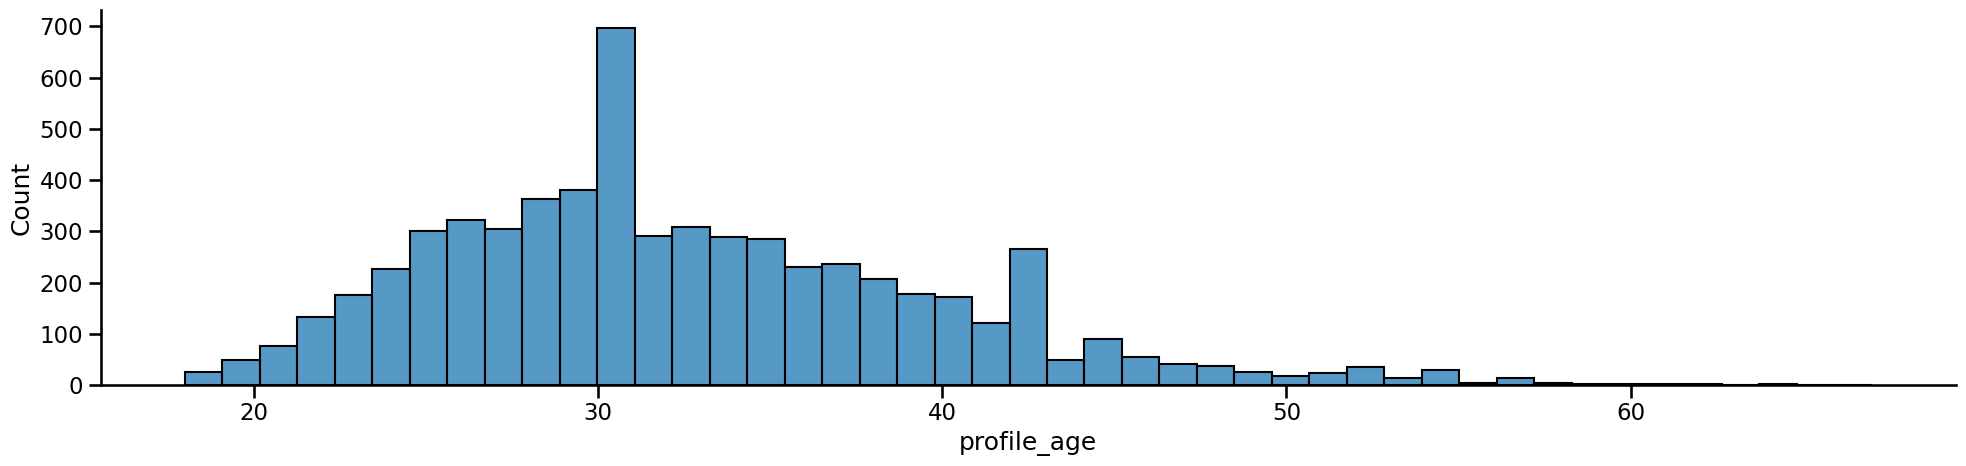

In [18]:
seaborn.displot(df.profile_age[df.profile_age < 100],
                 stat='count', aspect=4)

However, histograms can hide information. Why? Because they group ranges of values into automatically inferred intervals. As a result, the display varies with different segment lengths. For example, let's compare the following histograms.

/tmp/ipykernel_6554/3760847505.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


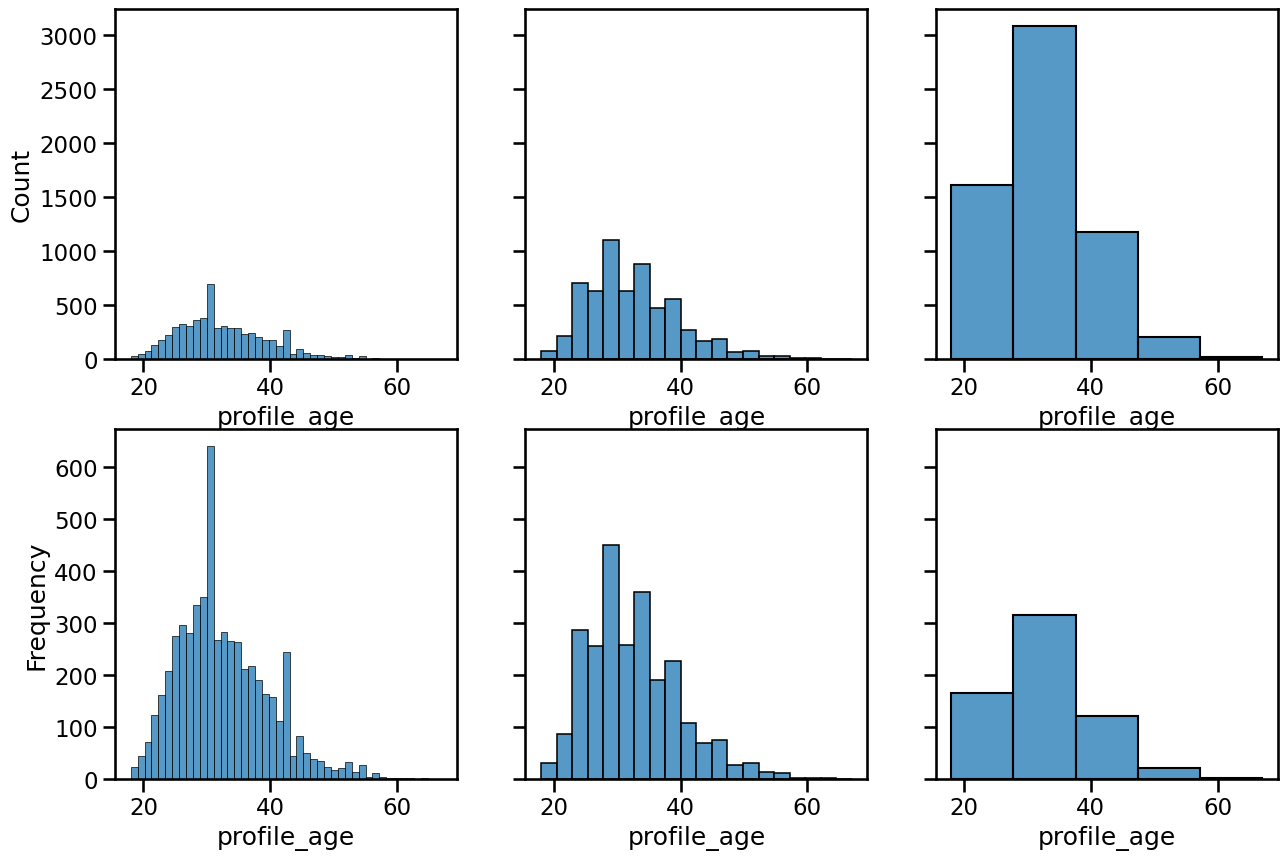

In [19]:
# Un ejemplo más avanzado
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharey='row')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,0],
                 stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,1],
                 bins=20, stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,2],
                 bins=5, stat='count')

seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,0],
                 stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,1],
                 bins=20, stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,2],
                 bins=5, stat='frequency')

fig.show()

For discrete variables, a line graph can be used, which allows visualizing the count of each of the points in the observed range.

**Can a line chart be used for the `salary_monthly_NET` variable? Makes sense?**

/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


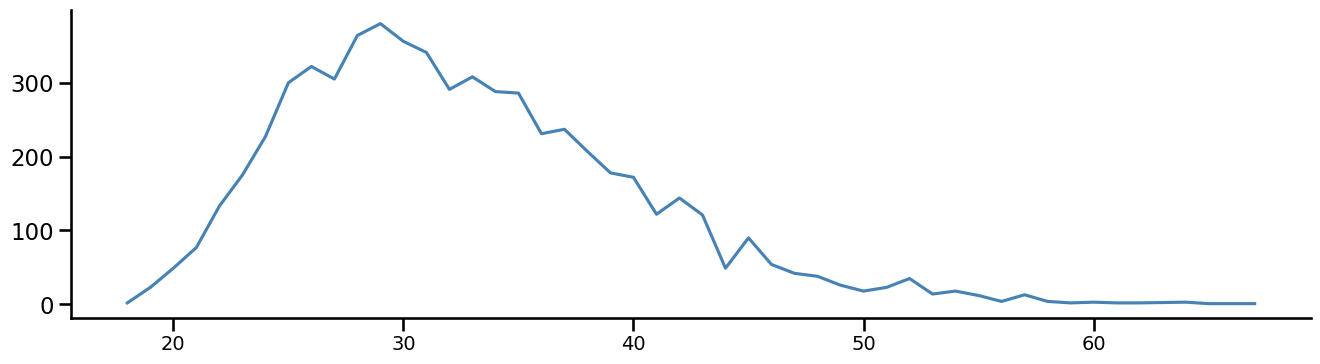

In [20]:
fig = plt.figure(figsize=(16,4))
age_counts = df[df.profile_age < 100].profile_age.value_counts()
seaborn.lineplot(age_counts.index, age_counts.values, color='steelblue')
plt.xticks(fontsize=14)
seaborn.despine()

### Categorical random variables

Categorical variables take values from a pre-defined set, usually but not necessarily finite. To visualize them, a bar graph can be used, representing each observed value with a column and the count of that value with the height of the column.

Discrete numerical variables; are they categorical?

In [21]:
df.profile_gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profile_gender', ylabel='count'>

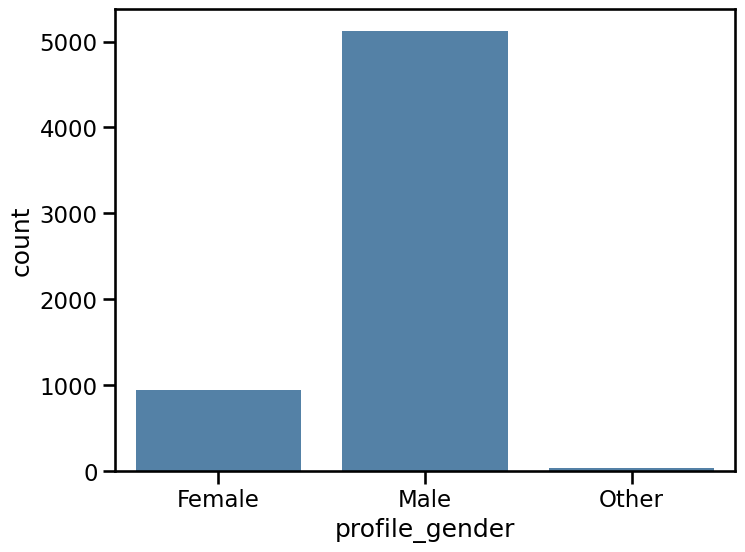

In [22]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_gender, color='steelblue')

Categorical variables can be *ordinal*if a logical order exists between their values. This is independent of whether they are numerical. If an order exists, it is appropriate to include it in the chart.

/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


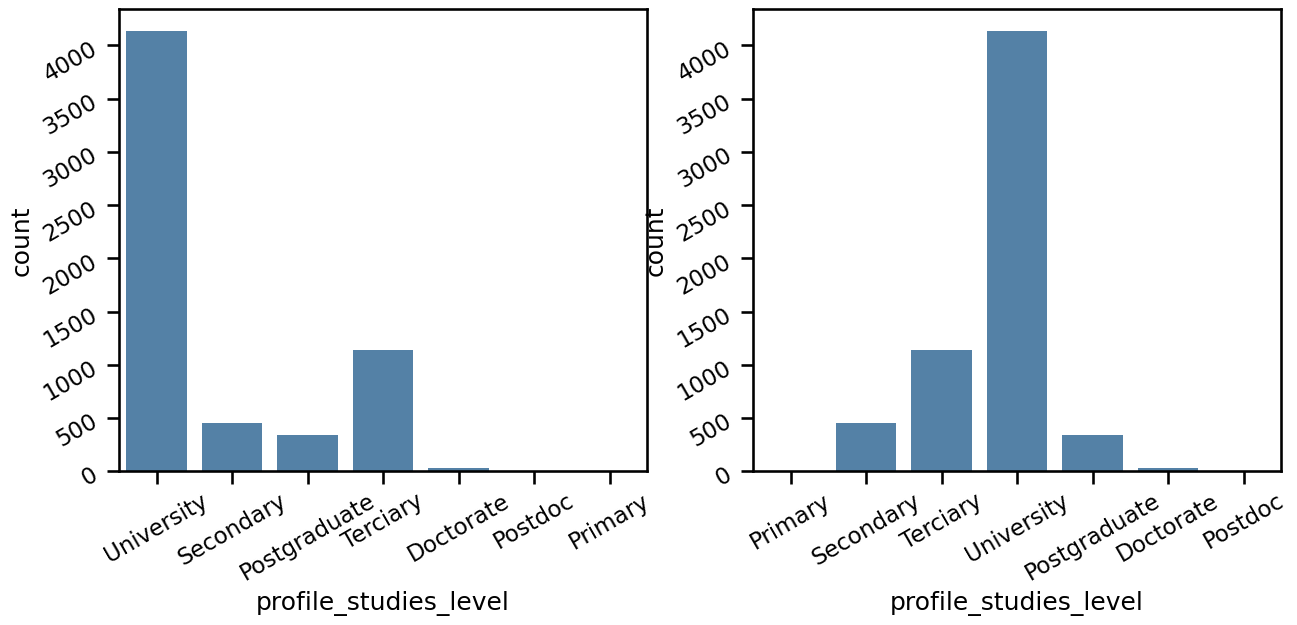

In [23]:
sorted_studies_levels = ['Primary', 'Secondary', 'Terciary', 'University',
                         'Postgraduate', 'Doctorate', 'Postdoc']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0])
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)

### Variable types vs data types

We have to distinguish two concepts with the same name and similar meaning but which are not the same:
  - **type of the random variable** is the type of values with which we decide to *interpret* the realizations
  - **data type** is a programming concept that indicates in what format the information is represented. When we assign a *Python program* variable `age` to a realization of a conceptual `profile_age` random variable, that `age` variable also has a *Python* type, for example, `int` or `float`.

In [24]:
age = df.profile_age.iloc[0]
type(age)

numpy.int64

*Important!* You must also consider the limits of computational capacity when representing mathematical entities.
* Real numbers are always "rounded" to a rational representation.
* Basic types like `Int` can only represent numbers in a range, eg `(-2^31, 2^31)`. Exceeding the range can have unexpected consequences, such as `integer overflow`.

Why is it important to know? Because rounding errors or approximate results may occur.

In [25]:
print(type(3), type(3.44), type(1/3))
import numpy
print(numpy.iinfo('int64').min, numpy.iinfo('int64').max)
numpy.int64(numpy.iinfo('int64').max) + 1

<class 'int'> <class 'float'> <class 'float'>
-9223372036854775808 9223372036854775807


/tmp/ipykernel_6554/2121719420.py:4: RuntimeWarning: overflow encountered in long_scalars
  numpy.int64(numpy.iinfo('int64').max) + 1


-9223372036854775808

The data types of the DataFrame can be accessed. The `object` type is used to represent any non-numeric variable, such as `str`.

In [26]:
df.dtypes[:10]

profile_gender                     object
profile_age                         int64
work_country                       object
work_province                      object
profile_years_experience          float64
work_years_in_company             float64
work_years_in_current_position    float64
work_people_in_charge_of            int64
profile_studies_level              object
profile_studies_level_state        object
dtype: object

Remember that the graphics libraries will allow us to create the visualizations we want, as long as the data types are appropriate.

For example, we can make a histogram of the variable `profile_open_source_contributions` by casting it to type `bool` (which is internally represented as an integer type). However, this doesn't make any sense.

In [27]:
df.loc[:,'salary_in_usd_bool'] = \
  df.salary_in_usd.replace({'My salary is dollarized': True}).fillna(False)
print(df.salary_in_usd.unique(), df.salary_in_usd_bool.unique())

[nan 'My salary is dollarized'] [False  True]


/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/user/nocampo/home/miniconda3/envs/sald/lib/python3.10/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot:xlabel='salary_in_usd_bool', ylabel='Count'>

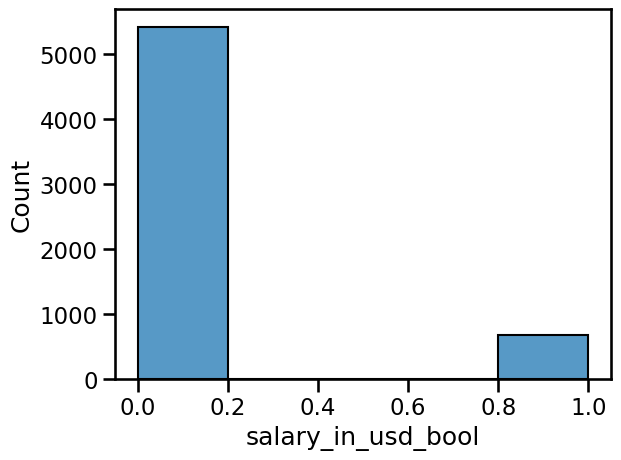

In [29]:
seaborn.histplot(df.salary_in_usd_bool, bins=5)

We can also plot the frequency of a categorical variable using a line graph. **Why is this plot incorrect?**

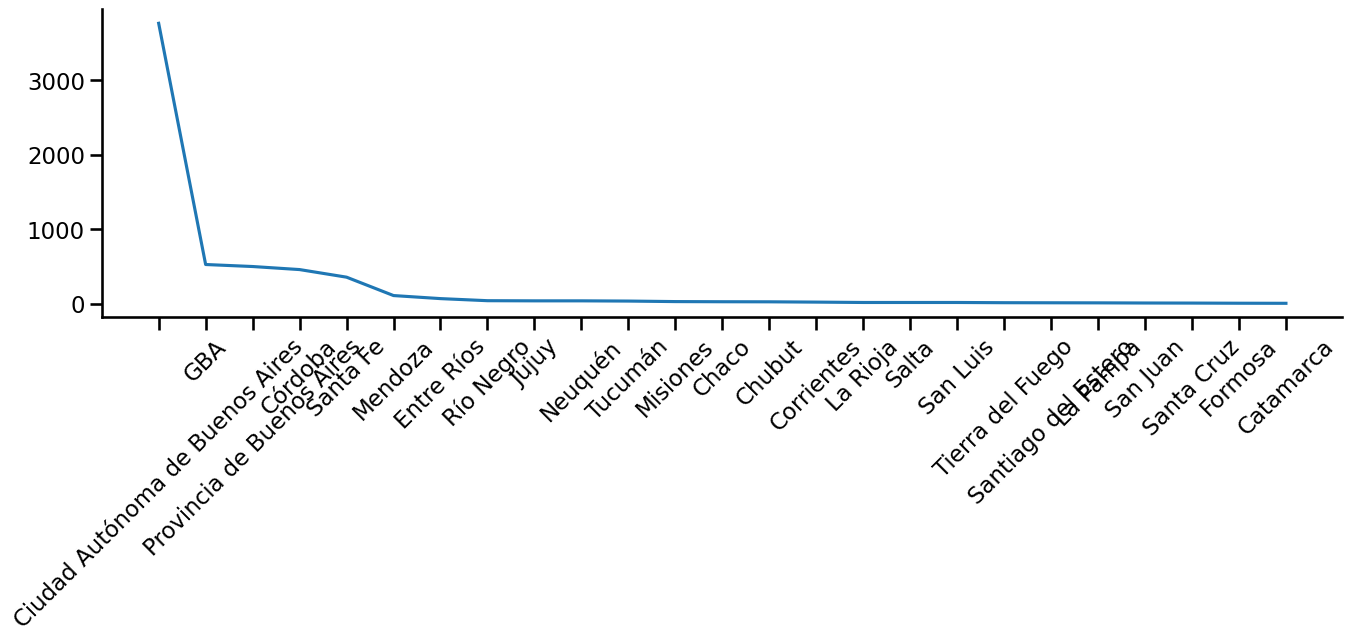

In [34]:
count_by_province = df.work_province.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.lineplot(x=count_by_province.index, y=count_by_province.values)
plt.xticks(rotation=45)
seaborn.despine()

# Analysis of the impact of years of experience

Now that we know roughly the shape of our data, we can move on to another question (another iteration of the analysis process):

**Does more years of experience mean you get paid more?**

To answer this question, we analyze the probability that a programmer has a monthly salary higher than the average when he has more than 5 years of experience.

In [23]:
avg_salary = df[salary_col].mean()
avg_salary

94907.9491018188

## Probability measure

We saw that if each of our events is independent and identically distributed, that is, $P(\{\omega_i\})=1/k$, then the probability of a set $A \subset \Omega$ is the ratio of $A$, where.

$$P(\{\omega_i\})=1/k \implies P(A)=|A|/|\Omega|=|A|/k$$

In this problem, $\Omega$ are all the answers in the dataset, each $a_i$ is a variable representing an answer, and the set $A$ are the answers (rows) in which the `salary_col` column has a higher than average value.


In [24]:
p_above_avg = len(df[df[salary_col] >= avg_salary]) / len(df)
p_above_avg

0.33125512715340444

* Why can we use probability theory?
* Why do we calculate a probability with this formula?
* How can we interpret this probability?

## Conditional Probability

Now we can move on to talk about the conditional probability between the two events. We define it as

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

This is equivalent to:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$

**If one has more than 5 years of experience, does the probability of earning more than the average increase? Are these events independent?**

In [25]:
is_above_avg = df[salary_col] > avg_salary
experience_greater_5 = df.profile_years_experience > 5
intersection_count = len(df[is_above_avg & experience_greater_5])

In [26]:
p_above_avg_given_experience = intersection_count / len(df[experience_greater_5])
p_above_avg_given_experience

0.4564245810055866

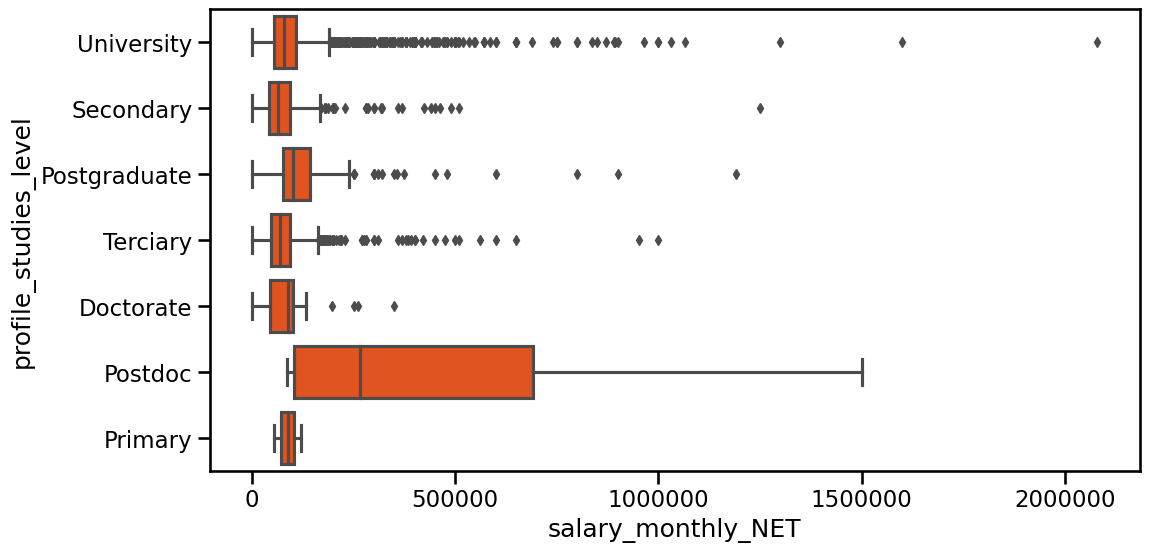

In [27]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')